# US Banking Sector Analysis


In this project we will focus on exploratory data analysis of the US banking sector through out the years of 2006 - 2016, which includes the global financial crisis.
____

## Imports

In [21]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

____
## API Selection

A single API was chosen for the assignment, which was provided by https://www.quandl.com/

The data specifically relates to stock prices, dividends and splits.

API - https://www.quandl.com/databases/WIKIP

The particular API is freely available upon signing up.

In [23]:
import quandl

____
## Data

#### Collecting Raw Data:

The below code uses the Quandl API to retrieve labeled financial data of the following companies between Jan 1st 2006 to Jan 1st 2016.

*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

I've set each bank to be a separate dataframe, with the variable being the specifics banks ticker symbol. 

In [24]:
# Time variable to get the Raw data from the API 
start = pd.to_datetime("2006-01-01")
end = pd.to_datetime("2016-01-01")

In [25]:
# Bank of America
BAC = quandl.get("WIKI/BAC",start_date=start,end_date=end)
# Citigroup
C = quandl.get("WIKI/C",start_date=start,end_date=end)
# Goldman Sachs
GS = quandl.get("WIKI/GS",start_date=start,end_date=end)
# JPMorgan Chase
JPM = quandl.get("WIKI/JPM",start_date=start,end_date=end)
# Morgan Stanley
MS = quandl.get("WIKI/MS",start_date=start,end_date=end)
# Wells Fargo
WFC = quandl.get("WIKI/WFC",start_date=start,end_date=end)

In [26]:
# Preview of the Citigroup dataset (First Five Records)
C.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,49.00,49.38,48.11,49.29,15376000.0,0.0,1.0,412.770569,415.971647,405.273308,415.213497,1537600.0
2006-01-04,48.86,49.10,48.35,48.38,18709000.0,0.0,1.0,411.591224,413.612958,407.295041,407.547758,1870900.0
2006-01-05,48.44,48.78,48.40,48.62,11431000.0,0.0,1.0,408.053191,410.917313,407.716235,409.569491,1143100.0
2006-01-06,48.88,48.90,48.20,48.62,13702000.0,0.0,1.0,411.759702,411.928180,406.031458,409.569491,1370200.0
2006-01-09,48.60,48.74,48.30,48.39,16807000.0,0.0,1.0,409.401013,410.580358,406.873846,407.631996,1680700.0


#### Using Pandas to create a dataframe including all bank stocks.

- Created a list of the ticker symbols (as strings) in alphabetical order then used pd.concat to concatenate the bank dataframes together into a single data frame with the variable name bank_stocks. 

- Set the keys argument equal to the tickers list and concatenated it on axis = 1. Then set the column name levels.

In [27]:
# Creation of the ticker symbols for each data frame
tickers =  ["BAC", "C", "GS", "JPM", "MS", "WFC"]

In [28]:
# Concatenation occurs on axis = 1, whilst
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC ],axis = 1, keys=tickers)

In [29]:
# Add column names Bank TIcker and Stock Info
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [30]:
# Preview of all banks dataset (First Five Records)
bank_stocks.head()

Bank Ticker    BAC                                                           \
Stock Info    Open   High    Low  Close      Volume Ex-Dividend Split Ratio   
Date                                                                          
2006-01-03   46.92  47.18  46.15  47.08  16296700.0         0.0         1.0   
2006-01-04   47.00  47.24  46.45  46.58  17757900.0         0.0         1.0   
2006-01-05   46.58  46.83  46.32  46.64  14970700.0         0.0         1.0   
2006-01-06   46.80  46.91  46.35  46.57  12599800.0         0.0         1.0   
2006-01-09   46.72  46.97  46.36  46.60  15619400.0         0.0         1.0   

Bank Ticker                                   ...    WFC                    \
Stock Info   Adj. Open  Adj. High   Adj. Low  ...    Low  Close     Volume   
Date                                          ...                            
2006-01-03   37.126108  37.331837  36.516835  ...  62.39  63.80  5508200.0   
2006-01-04   37.189409  37.379312  36.754214  ...  62.73  63.06  5435000.0   
2006-01-05   36.857078  37.054894  36.651349  ...  62.62  62.99  5079000.0   
2006-01-06   37.031156  37.118195  36.675087  ...  62.77  63.36  4201900.0   
2006-01-09   36.967855  37.165671  36.683000  ...  63.11  63.35  2809800.0   

Bank Ticker                                                           \
Stock Info  Ex-Dividend Split Ratio  Adj. Open  Adj. High   Adj. Low   
Date                                                                   
2006-01-03          0.0         1.0  22.799832  23.070400  22.507619   
2006-01-04          0.0         1.0  22.944135  22.958566  22.630277   
2006-01-05          0.0         1.0  22.727681  22.767364  22.590594   
2006-01-06          0.0         1.0  22.785402  22.926097  22.644707   
2006-01-09          0.0         1.0  22.853946  22.962173  22.767364   

Bank Ticker                         
Stock Info  Adj. Close Adj. Volume  
Date                                
2006-01-03   23.016287  11016400.0  
2006-01-04   22.749327  10870000.0  
2006-01-05   22.724074  10158000.0  
2006-01-06   22.857554   8403800.0  
2006-01-09   22.853946   5619600.0  

[5 rows x 72 columns]

#### Data check

- Looking for missing data to see if processing is needed.
- Checking if any of the numeric data is a string.

In [31]:
# c=Calculates the sum of all the null values in all the fields(columns)
bank_stocks.isnull().sum()

Bank Ticker  Stock Info 
BAC          Open           0
             High           0
             Low            0
             Close          0
             Volume         0
                           ..
WFC          Adj. Open      0
             Adj. High      0
             Adj. Low       0
             Adj. Close     0
             Adj. Volume    0
Length: 72, dtype: int64

In [32]:
# Further check if any of the numeric data is not string
bank_stocks.dtypes.value_counts()

float64    72
dtype: int64

#### Pre-Processing Completed

- We can see that there is no Null value in the data, and all stock values are not strings.

- This means there are no values in the dataset such as "Not Available" or "NA", etc.

- Both of these are highly indicative that all values are present.

____
## Explorative Data Analysis

- Documentation used:
[Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html)
[Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

- In the following, we will be focusing on the closing price to understand the exact cash positions of the stocks end of day.

In [33]:
# Exploring the typical data metrics for all stocks "Closing" price.
bank_stocks.xs(key='Close',axis=1,level='Stock Info').describe()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,22.174575,33.001709,158.481289,45.985346,36.006091,37.615326
std,15.304962,19.380391,35.637855,9.839428,18.668909,12.349814
min,3.140000,1.020000,52.000000,15.900000,9.200000,8.120000
25%,12.270000,11.820000,138.180000,39.710000,23.870000,28.490000
50%,15.790000,39.450000,161.980000,44.590000,30.340000,34.145000
75%,32.630000,50.030000,182.120000,52.540000,40.210000,46.080000
max,54.900000,60.340000,247.920000,70.080000,89.300000,73.000000


Created a new empty DataFrame called returns. This dataframe contains the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

We use pandas pct_change() method on the Close column to create a column representing this return value. First row will have null values due to the above formula.

In [34]:
# creates a new dataframe called returns
returns = pd.DataFrame()

for tick in tickers:
    # gives a title for the column
    # for every bank stock ticker uses the close ticker and make pct changes
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()

    returns.head()

In [35]:
# preview of the returns data
# note the first row is NaN due to the returns formula used
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


### Pairplot

- By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

- In this example, we use this to give a general visual overview of the given dataset.

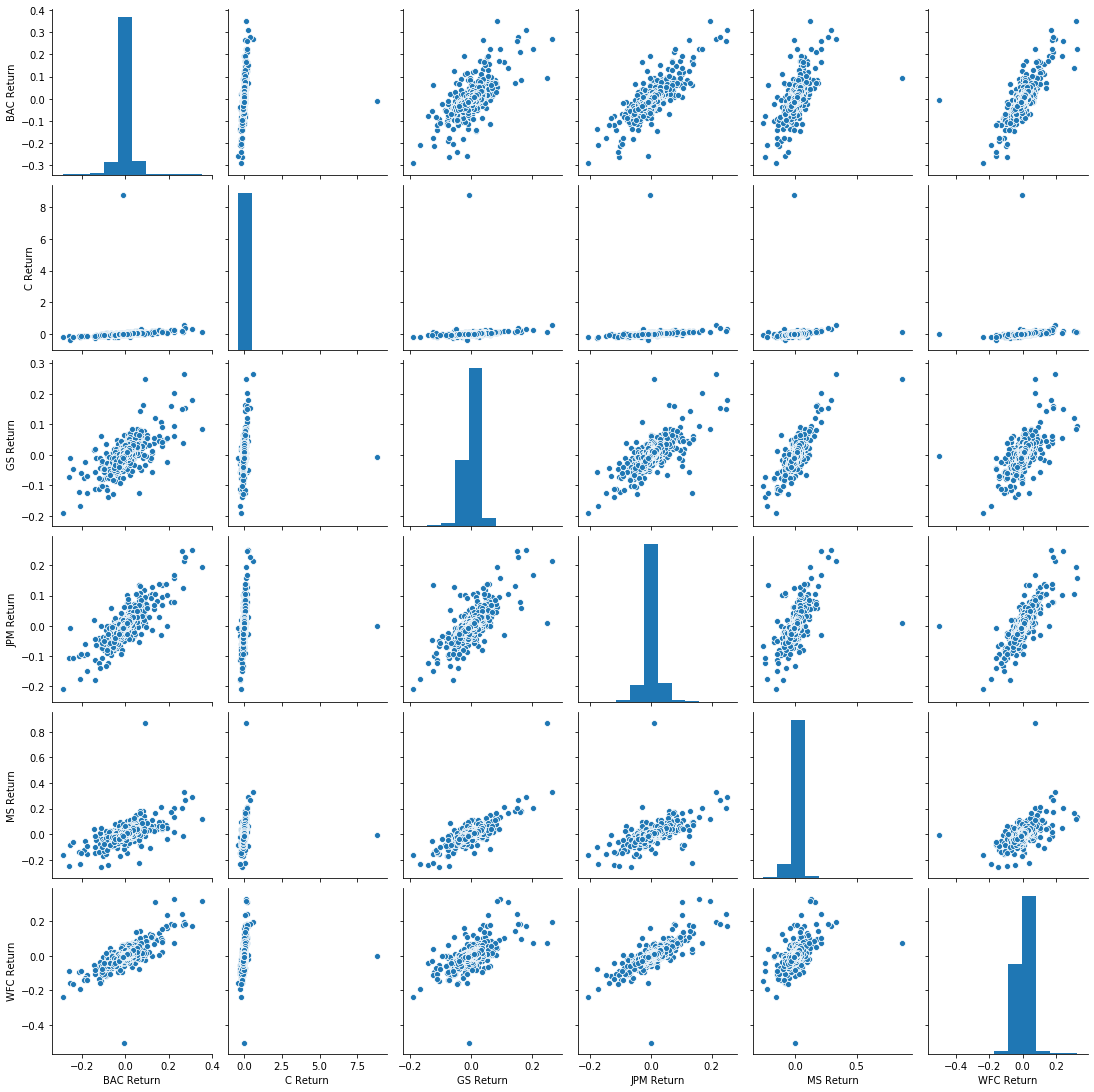

In [36]:
# returns[1:] because index 0 has null values
sns.pairplot(returns[1:]);

#### Interpretation

- Most graphs have a somewhat normal linear relationship which is expected with similar companies within an asset class.

- However, Citigroup return values are vertical along the 2nd column when its on the x Axis, with all other banks (y axis). After analysis, we found that it is due to a large market crash because of the subprime morgage crisis in 2008. Citi found itself having to write of tens of billions of dollars of bad loans as a result.

- Massive layoffs and plans to sell more than $400 billion in assets turned out to be overly ambitous, and in the end, the U.S. government took a massive stake in Citi bank in order to help it stave of catastrophe.

- Source: https://www.fool.com/investing/2017/06/20/citigroup-stock-history-from-boom-to-crisis-and-ba.aspx


### Return & Standard Deviations

- We use the idx documentation (https://docs.python.org/3/genindex-I.html) to find specific dates of the:
      
   - maximum return;
   - minimum return;
   - standard deviation of returns, and
   - any outliers.

In [37]:
# returns dates for the minimum close prices within the time period
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2006-08-14
dtype: datetime64[ns]

In [38]:
# returns dates for the maximum close prices within the time period
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [39]:
# returns the standard deviations of returns on closed prices within the time period
returns.std()

BAC Return    0.036628
C Return      0.179066
GS Return     0.025358
JPM Return    0.027651
MS Return     0.037820
WFC Return    0.031838
dtype: float64

In [41]:
# returns the standard deviations within thie time period
returns.idx['2015-01-01':'2015-12-31'].std() # Very similar risk profiles

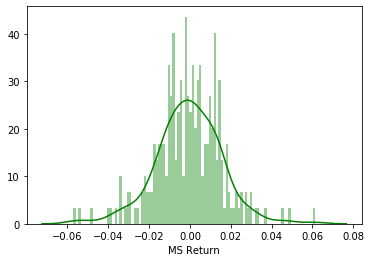

In [42]:
# 2015 returns distribution between 2015-01-01 to 2015-12-31
# deviations are around .06 around the mean
sns.distplot(returns['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100);

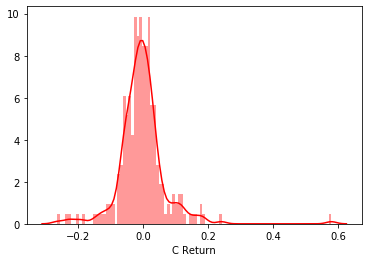

In [43]:
# Citigroup returns for the time period of 2008-01-01 to 2008-12-31
# Std are quite streched out, it has an outlier at 0.6
sns.distplot(returns['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100);

#### Interpretation

- Majority of the banks closing prices dropped dramaticically on the 20/01/2020, interestingly this was Barrack Obamas inaugration day. This may be the a larger macroeconomic effect on the prices accross asset classes as historically elections have created volatility in the markets.

- Interestingly, JP Morgan's largest gain in the given time period was a day after Obama's inaugration.

- Additionally, in the overall portfolio, Citigroup is the most riskiest bank out of all of the chosen companies, based on its standard deviation of returns being the highest out of all banks int he given time period. With Morgan Stanly being the second riskiest based on its standard deviation.

- Citigroup's largest gain was on on the 9th of May 2011 where a reverse stock split occured.

- A reverse stock split is a type of corporate action that consolidates the number of existing shares of stock into fewer (higher priced) shares. A reverse stock split divides the existing total quantity of shares by a number such as five or ten, which would then be called a 1-for-5 or 1-for-10 reverse split, respectively.

- The standard deviaton of returns of Morgan Stanley is around .06 around the mean within the year of 2015.

- The standard deviaton of returns Morgan Stanley is around .02 around the mean within the year of 2008. However there is an outlier return of 0.6.

- Source: https://www.citigroup.com/citi/news/2011/110321a.htm

### Line plot

- Line Plots display numerical values on one axis, and categorical values on the other.
- We use a line plot to display all banks in a line plot by Price and Date for the purpose of comparisons.

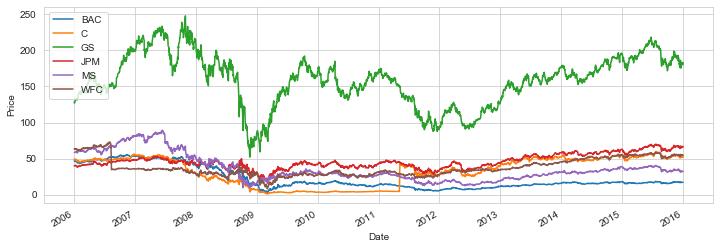

In [44]:
# Styling
sns.set_style('whitegrid')

# Loop to display all banks via their ticker and the closing prices.
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
    
    plt.xlabel('Date') # Setting Label for X-Axis
    plt.ylabel('Price') # Setting Label for Y-Axis
    plt.legend(); # Setting a legend

In [66]:
# Interactive line plot
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

#### Interpretation

- We notice that within this time period, all stocks dropped dramatically during late 2008 and early 2009, with Goldman Sachs dropping from a high of 250 to 60 dollars per share.

- The large decline in Goldman Sachs share value was due to a reported 2.1 billion dollar loss due to the global financial crisis. Interestingly this was Goldman Sachs first reported loss since going public in 1999.

- Source: https://money.cnn.com/2008/12/16/news/companies/goldman_sachs/index.htm

- Furthermore, GoldmanSachs had a steady rebound from 2009 to a closing price value similar to 2008, in late 2009.

- Citigroup's largest gain was on on the 9th of May 2011, where a reverse stock split occured (explained above).

- Wells Fargo had a steep decrease in price in the middle of 2006 due to a 2:1 stock split.

- Source: https://www08.wellsfargomedia.com/assets/pdf/about/investor-relations/2006-stock-split.pdf

### Moving Averages Line Plot

- Moving averages are technical indicators that investors often use in the stock market. A moving average (MA) represents the sum of the closing prices of a security over a specific number of periods, which is then divided by the total number of periods. A moving average is depicted as a line chart that is superimposed over a stock's price action.

- Once a moving average is calculated and plotted on a chart, it can be a powerful visual trend-spotting tool. If a moving average is rising, it can signal that a stock is in an uptrend. Conversely, when a moving average is falling, it can signal that a stock is in a downtrend. Let's look at this indicator and how it can help investors follow trends toward greater profits

- Rolling 30 day average against the Close Price of Bank Of America's stock for the year 2008.

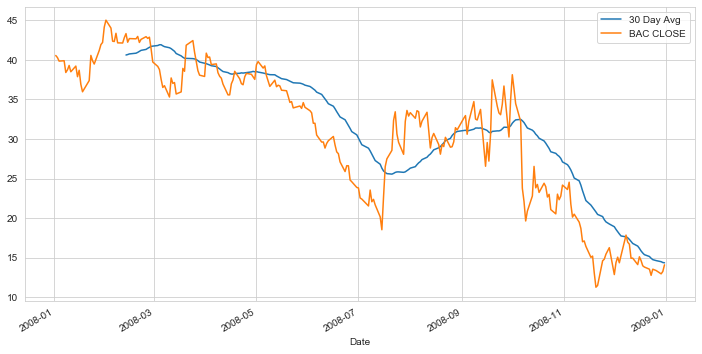

In [45]:
plt.figure(figsize=(12,6)) # increases the graph size
BAC['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close']['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend();

#### Interpretation

- This moving average line plot can be used to design a trading stratergy via moving averages in where you take advantage of the price viscitudes using long/short positions.

- We can see that there was a downwards trend from March 2008 to July 2008. Then a slight upwards trend from late July 2008 to October 2008. However the trend then finished the year with a downwards slope.

- Overall Bank of America has a downwards trend in price for the year 2008.

### Correlation table 

- A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analysis.

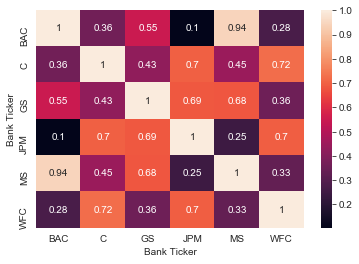

In [46]:
# uses seaborn to create a heatmap of correlations
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True);

#### Interpretation

- In the banking asset classe, we notice that within this time period, Morgan Stanley Bank of America, JP Morgan and Citibank's returns have a relatively high correlation of 0.94 and 0.7. This is expected with similar assets within a asset classe.

- However, Morgan Stanley and JP Morgan have a relatively low correlation of 0.25, which will give diversification benefits within this asset class, if allocated to a portfolio.

### CandleStick Plot

- Candlestick charts are a scientific tool that packs data for multiple time frames into individual price bars..
- Candlesticks create patterns that predict price direction once completed.
- To generate a candlestick graph, the data set should contain open, high, low and close values for each period you want to display.

In [67]:
# Creates a candlestick graph for the year 2015
BAC[['Open', 'High', 'Low', 'Close']]['2015-01-01':'2016-01-01'].iplot(kind='candle')

#### Interpretation

- The filled part of the candlestick is termed “the body”. The long thin lines above and below the body represent the high/low range and are called “shadows”. The top of the upper shadow is noted as the high, and bottom of the lower shadow is indicated by the low.
- The green coloured candlestick in the above plot represents that the stock closes higher than its opening price, here the top of the body represents the opening price and the bottom of the body denotes the closing price.
- The red coloured candlestick in the above plot represents that the stock closes lower than its opening price, here the bottom of the body represents the opening price and the top of the body denotes the closing price.
- More stretched body of a candlestick denotes, more intense buying or selling pressure . Conversely, short candlesticks indicate little price movement and represent consolidation.
- We can see in the above plot that there are more red candlesticks compared to green, this implies that overall the stock prices decrease but as there is a larger number of green long candlesticks, it means that there were larger price movements.


### A Simple Moving Averages plot

- A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.

- In this case we are using the plot to describe Morgan Stanley for the year 2015.

In [68]:
# period (13, 21, 55) are the technical analysis time frames
# using ta_plot being the technical anylsis framework
MS['Close']['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

#### Interpretation

- Market analysts and traders use moving averages to help identify trends in price fluctuations, smoothing out the noise and short-lived spikes (from news and earnings announcements, for example) for individual securities or indexes. There are different types of moving averages, calculated in different ways and over different time periods, which reveal different information for traders. The type of moving average and measurement period used determine the strategies a trader implements.

- The 13, 21 and 55-day moving averages are often used to spot near-term trend changes. Changes in direction by these shorter-term moving averages are watched as possible early clues to longer-term trend changes.

- Moving averages are used to identify significant support and resistance levels. Traders and market analysts watch for crossovers of longer-term moving averages by shorter-term moving averages as possible indicators of trend changes in intraday trading and in regard to long-term trends. Most moving averages act as both trendline indicators and as the building blocks of more ambitious technical tools.

- This is an interactive plot visualising the simple moving averages of 13, 21 and 55 days of Morgan Stanley for the year of 2015.

- We notice crossovers occuring late February which indicated an upward trend, late July indicating a downwards trend and early November indicating an upwards trend.


### Bollinger Bands Plot

- A Bollinger Band is a technical analysis tool defined by a set of trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of a security's price, but which can be adjusted to user preferences.

- In this case we are using the plot to describe Bank of America for the year 2015.

In [69]:
# Creates bolinger bands for the year 2015
BAC['Close']['2015-01-01':'2016-01-01'].ta_plot(study='boll')

#### Interpretation

- Bollinger Bands are a highly popular technique. Many traders believe the closer the prices move to the upper band, the more overbought the market, and the closer the prices move to the lower band, the more oversold the market.

- We can take advantage of these bands by shorting BAC when the close price hits the upper(14) bolinger band and long the lower(14) bolinger band when the close price hits it.